In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualización de datos

In [9]:
# URL de la página a raspar
url = 'http://books.toscrape.com/'

# Hacer una solicitud HTTP GET para obtener el contenido de la página
response = requests.get(url)

# Verificamos que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    print("Conexión exitosa, procesando contenido...")

    # Usamos BeautifulSoup para analizar el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar todos los libros en la página. Cada libro está en un div con la clase 'product_pod'
    books = soup.find_all('article', class_='product_pod')
    book_data=[]
    # Iterar sobre cada libro y extraer su título y precio
    for book in books:
        # Obtener el título del libro
        title = book.find('h3').find('a')['title']

        # Obtener el precio del libro
        price = book.find('p', class_='price_color').get_text()
        price=price.replace("Â£","")
        book_data.append({'Title': title, 'Price': price})
        # Mostrar el título y precio
        df1=pd.DataFrame(book_data)

else:
    print(f"Error al conectarse al sitio, código de estado: {response.status_code}")


Conexión exitosa, procesando contenido...


In [11]:
df1

,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets of Getting Your Dream...,33.34
7,The Coming Woman: A Novel Based on the Life of...,17.93
8,The Boys in the Boat: Nine Americans and Their...,22.60
9,The Black Maria,52.15


In [12]:
# URL de la página de citas
url = 'http://quotes.toscrape.com/'

# Hacer una solicitud HTTP GET para obtener el contenido de la página
response = requests.get(url)

# Verificamos que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    print("Conexión exitosa, procesando contenido...")

    # Usamos BeautifulSoup para analizar el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar todas las citas. Cada cita está dentro de un div con la clase 'quote'
    quotes = soup.find_all('div', class_='quote')

    # Lista para almacenar los datos de las citas
    quotes_data = []

    # Iterar sobre cada cita y extraer su texto, autor y etiquetas
    for quote in quotes:
        # Obtener el texto de la cita
        text = quote.find('span', class_='text').get_text()

        # Obtener el nombre del autor
        author = quote.find('small', class_='author').get_text()

        # Obtener las etiquetas (si las tiene)
        tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]

        # Agregar los datos de la cita a la lista
        quotes_data.append({'Text': text, 'Author': author, 'Tags': ', '.join(tags)})

    # Convertir la lista de citas en un DataFrame de pandas
    df = pd.DataFrame(quotes_data)

    # Mostrar el DataFrame

else:
    print(f"Error al conectarse al sitio, código de estado: {response.status_code}")


Conexión exitosa, procesando contenido...


In [13]:
df

,Text,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


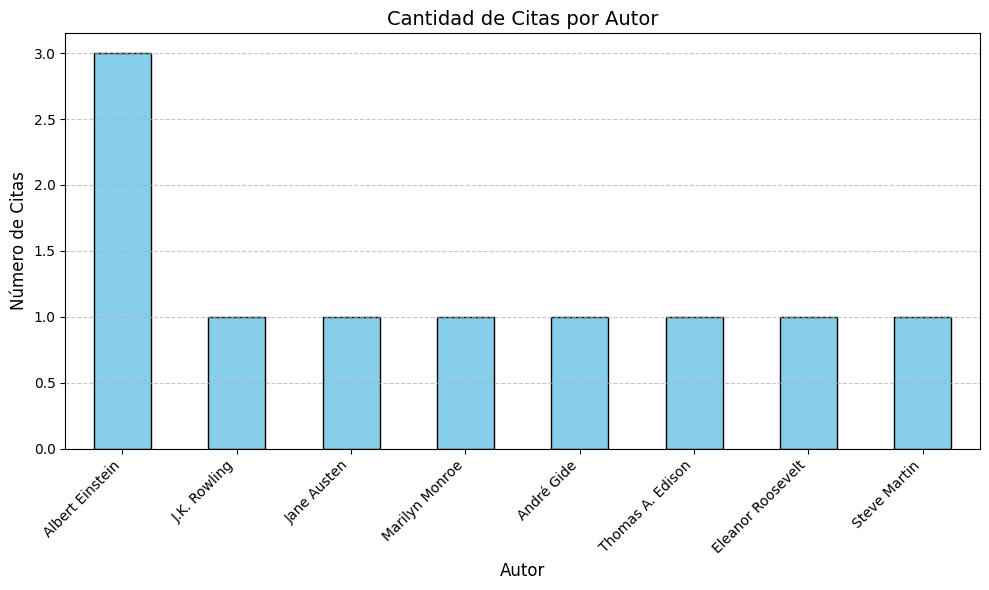

In [ ]:
# Contar la cantidad de citas por autor
author_counts = df['Author'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajustes
plt.title('Cantidad de Citas por Autor', fontsize=14)
plt.xlabel('Autor', fontsize=12)
plt.ylabel('Número de Citas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [15]:
# URL de la página de los mejores libros de Goodreads
url = "https://www.goodreads.com/list/show/1.Best_Books_Ever"

# Cabeceras para simular una solicitud desde un navegador real
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Realizar la solicitud HTTP GET
response = requests.get(url, headers=headers)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    print("Conexión exitosa, procesando contenido...")

    # Usamos BeautifulSoup para analizar el contenido HTML de la página
    soup = BeautifulSoup(response.text, "html.parser")

    # Encontramos todos los libros en la página
    books = soup.find_all("tr", itemtype="http://schema.org/Book")

    # Lista para almacenar los datos de los libros
    book_data = []

    for book in books:
        title = book.find("a", class_="bookTitle").text.strip()  # Obtener el título del libro
        author = book.find("a", class_="authorName").text.strip()  # Obtener el autor del libro
        rating = book.find("span", class_="minirating").text.strip()  # Obtener la calificación

        # Almacenar los datos en la lista
        book_data.append({"Title": title, "Author": author, "Rating": rating})

    # Convertir los datos en un DataFrame
    df4 = pd.DataFrame(book_data)



else:
    print(f"Error al conectarse al sitio, código de estado: {response.status_code}")


Conexión exitosa, procesando contenido...


In [16]:
print(df4.shape)
df4.head()


(100, 3)


,Title,Author,Rating
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.34 avg rating — 9,294,149 ratings"
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"4.50 avg rating — 3,608,295 ratings"
2,Pride and Prejudice,Jane Austen,"4.29 avg rating — 4,507,719 ratings"
3,To Kill a Mockingbird,Harper Lee,"4.26 avg rating — 6,549,277 ratings"
4,The Book Thief,Markus Zusak,"4.39 avg rating — 2,739,892 ratings"


In [17]:
# Dividir la columna 'Rating' en dos columnas: 'Avg Rating' y 'Num Ratings'
df4[['Avg Rating', 'Num Ratings']] = df4['Rating'].str.extract(r'([0-9.]+) avg rating — ([\d,]+) ratings')

# Limpiar la columna 'Num Ratings' eliminando las comas y convirtiendo a tipo numérico
df4['Num Ratings'] = df4['Num Ratings'].str.replace(',', '').astype(int)

# Mostrar el DataFrame resultante
df4




,Title,Author,Rating,Avg Rating,Num Ratings
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.34 avg rating — 9,294,149 ratings",4.34,9294149
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"4.50 avg rating — 3,608,295 ratings",4.50,3608295
2,Pride and Prejudice,Jane Austen,"4.29 avg rating — 4,507,719 ratings",4.29,4507719
3,To Kill a Mockingbird,Harper Lee,"4.26 avg rating — 6,549,277 ratings",4.26,6549277
4,The Book Thief,Markus Zusak,"4.39 avg rating — 2,739,892 ratings",4.39,2739892
...,...,...,...,...,...
95,"Angela’s Ashes (Frank McCourt, #1)",Frank McCourt,"4.15 avg rating — 645,096 ratings",4.15,645096
96,Interview with the Vampire (The Vampire Chroni...,Anne Rice,"4.02 avg rating — 623,180 ratings",4.02,623180
97,Don Quixote,Miguel de Cervantes Saavedra,"3.90 avg rating — 290,650 ratings",3.90,290650
98,The Old Man and the Sea,Ernest Hemingway,"3.81 avg rating — 1,233,475 ratings",3.81,1233475


In [18]:
# Borrar la columna 'Rating' sin asignar el resultado a un nuevo DataFrame
df4.drop(columns=['Rating'], inplace=True)

# Mostrar el DataFrame después de eliminar la columna
df4.head()


,Title,Author,Avg Rating,Num Ratings
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,9294149
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3608295
2,Pride and Prejudice,Jane Austen,4.29,4507719
3,To Kill a Mockingbird,Harper Lee,4.26,6549277
4,The Book Thief,Markus Zusak,4.39,2739892


In [ ]:
print(df["Avg Rating"].min())
print(df["Avg Rating"].max())

3.66
4.62


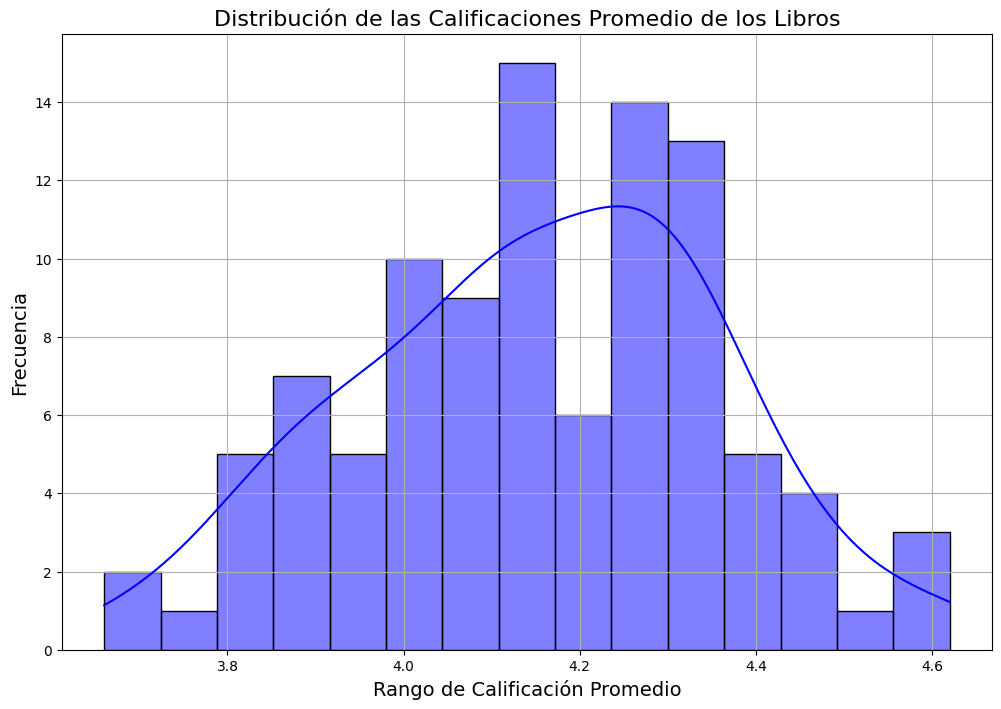

In [19]:
df4['Avg Rating'] = pd.to_numeric(df4['Avg Rating'], errors='coerce')
# Crear los rangos de puntuación basados en los valores que mencionas
bins = [3.6, 3.8, 4.0, 4.2, 4.4, 4.6]  # Definir los rangos de puntuación
labels = ['3.6-3.8', '3.8-4.0', '4.0-4.2', '4.2-4.4', '4.4-4.6']  # Etiquetas para cada rango

# Asignar los rangos a una nueva columna
df4['Rating Range'] = pd.cut(df4['Avg Rating'], bins=bins, labels=labels, include_lowest=True)

# Crear un histograma con los rangos de puntuación
plt.figure(figsize=(12, 8))  # Aumentar el tamaño de la figura

# Usando seaborn para crear el histograma
sns.histplot(df4['Avg Rating'], bins=15, kde=True, color="blue")

# Ajustes del gráfico
plt.title('Distribución de las Calificaciones Promedio de los Libros', fontsize=16)
plt.xlabel('Rango de Calificación Promedio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [20]:
df4["Avg Rating"].describe()

,Avg Rating
count,100.000000
mean,4.152300
std,0.206147
min,3.660000
25%,4.000000
50%,4.155000
75%,4.300000
max,4.620000


Resumen del análisis:
Distribución de los datos:

La media (4.15210) y la mediana (4.15500) son muy cercanas, lo que sugiere que la distribución de los datos es simétrica o ligeramente simétrica.

La desviación estándar (0.20586) es pequeña, lo que indica que los datos están concentrados alrededor de la media.

Rango de los datos:

El rango de los datos es 4.62000 - 3.66000 = 0.96000. Esto muestra que los valores están en un intervalo relativamente estrecho.

Cuartiles:

El 25% de los datos está por debajo de 4.00000.

El 50% de los datos está por debajo de 4.15500.

El 75% de los datos está por debajo de 4.30000.

Valores atípicos (outliers):

Dado que la diferencia entre el tercer cuartil (4.30000) y el valor máximo (4.62000) es 0.32000, y la diferencia entre el primer cuartil (4.00000) y el valor mínimo (3.66000) es 0.34000, no parece haber valores atípicos extremos. Sin embargo, un diagrama de caja (boxplot) podría confirmar esto visualmente.

## Otra forma de web scrapping

In [5]:
import pandas as pd
df3=pd.read_html("https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n")
tabla_paises=df3[2]
tabla_paises


,0,1,2,3
0,Tabla de países y territorios dependientes por...,Tabla de países y territorios dependientes por...,Tabla de países y territorios dependientes por...,NaN
1,N.º País (o territorio dependiente) Población ...,N.º País (o territorio dependiente) Población ...,N.º País (o territorio dependiente) Población ...,NaN
2,N.º,País (o territorio dependiente),Población estimada por la ONU para mediados de...,% del total mundial
3,1,China,543 979 000,2177
4,2,India,357 021 000,1428
...,...,...,...,...
714,234,Islas Malvinas (RU),3 000,000
715,235,Niue (NZ),2 000,000
716,236,Tokelau (NZ),2 000,000
717,237,Ciudad del Vaticano,1 000,000


In [6]:
tabla_paises=tabla_paises.iloc[2:]
tabla_paises

,0,1,2,3
2,N.º,País (o territorio dependiente),Población estimada por la ONU para mediados de...,% del total mundial
3,1,China,543 979 000,2177
4,2,India,357 021 000,1428
5,3,Estados Unidos,148 282 000,593
6,4,Rusia,102 580 000,410
...,...,...,...,...
714,234,Islas Malvinas (RU),3 000,000
715,235,Niue (NZ),2 000,000
716,236,Tokelau (NZ),2 000,000
717,237,Ciudad del Vaticano,1 000,000


In [7]:
tabla_paises.columns = tabla_paises.iloc[0]  # Establecer la primera fila como encabezado
tabla_paises = tabla_paises[1:].reset_index(drop=True)
tabla_paises

2,N.º,País (o territorio dependiente),Población estimada por la ONU para mediados del año 1950,% del total mundial
0,1,China,543 979 000,2177
1,2,India,357 021 000,1428
2,3,Estados Unidos,148 282 000,593
3,4,Rusia,102 580 000,410
4,5,Japón,84 353 000,338
...,...,...,...,...
711,234,Islas Malvinas (RU),3 000,000
712,235,Niue (NZ),2 000,000
713,236,Tokelau (NZ),2 000,000
714,237,Ciudad del Vaticano,1 000,000


## Jugando con la API de X(twitter)

In [ ]:
!pip install tweety

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 26.2 MB/s eta 0:00:00
  Created wheel for tweety: filename=tweety-0.1.6-py3-none-any.whl size=4909 sha256=4ed9ad6ee60ff68d8c9e0d06547a41519f089462f8f107eb92e64e0c7dfb0393
  Stored in directory: /root/.cache/pip/wheels/34/0b/dd/9275383ab5375a02a6fe0f59585d7bfecdda0cdf789dc020b0
  Created wheel for chromedriver-binary: filename=chromedriver_binary-74.0.3729.6.0-py3-none-any.whl size=5072219 sha256=fef8ba3e54fdf8cf59a2db6769409205dc2b3891cd7cbd132a6e516ab1cbf66d
  Stored in directory: /root/.cache/pip/wheels/99/b2/43/c3a3b8b463201b0f48149a8a564f3ba39813581326af556051
Successfully built tweety chromedriver-binary


In [ ]:
import requests

# Reemplaza con tu BEARER TOKEN de la API de Twitter
BEARER_TOKEN = "token"
USERNAME = "Elonmusk"  # Cambia esto por el usuario que quieras analizar

def get_user_id(username):
    """Obtiene el ID de usuario de un nombre de usuario"""
    url = f"https://api.twitter.com/2/users/by/username/{username}"
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    response = requests.get(url, headers=headers)
    return response.json().get("data", {}).get("id")

def get_tweets(user_id):
    """Obtiene los últimos tweets de un usuario"""
    url = f"https://api.twitter.com/2/users/{user_id}/tweets?max_results=100"
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    response = requests.get(url, headers=headers)
    return response.json()

user_id = get_user_id(USERNAME)
tweets = get_tweets(user_id)

# Mostrar los tweets
for tweet in tweets.get("data", []):
    print(tweet["text"])
